<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/optimization-algrithms/gradient-descent/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==0.17.0

In [ ]:
import numpy as np
import tensorflow as tf
from mpl_toolkits import mplot3d
from d2l import tensorflow as d2l

In [ ]:

def f(x):
    return x ** 2


In [ ]:
def f_grad(x):
    return 2 * x

In [ ]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'Epoch 10, x: {x:f}')
    return results

In [ ]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = tf.range(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

Epoch 10, x: 0.001049


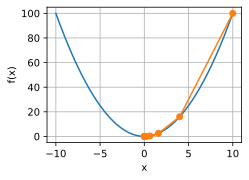

In [ ]:
results = gd(0.3, f_grad)
show_trace(results, f)

Epoch 10, x: 61.917364


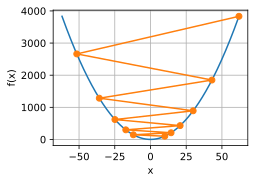

In [ ]:
show_trace(gd(1.1, f_grad), f)

Epoch 10, x: 3.486784


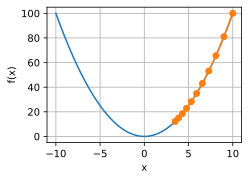

In [ ]:
show_trace(gd(0.05, f_grad), f)

In [ ]:
def train_2d(trainer, steps=20):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    return results

In [ ]:
def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1),
                         np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

In [ ]:
f = lambda x1, x2: x1 ** 2 + 2 * x2 ** 2
gradf = lambda x1, x2: (2 * x1, 4 * x2)

In [ ]:
def gd(x1, x2, s1, s2):
    (g1, g2) = gradf(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

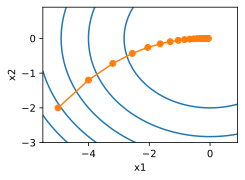

In [ ]:
eta = 0.1
show_trace_2d(f, train_2d(gd))